<a href="https://colab.research.google.com/github/ananyagoel18/Data-analysis/blob/main/stanford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install numpy pandas matplotlib scikit-learn

# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving subjects_info.csv to subjects_info (1).csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load the data
df = pd.read_csv('/content/subjects_info.csv')  # Replace with your actual file name

# Explore the first few rows of the dataset
df.head()

# Check for missing data
df.isnull().sum()

,0
record,0
activity,0
gender,0
height,0
weight,0
age,0
bp_sys_start,0
bp_sys_end,0
bp_dia_start,0
bp_dia_end,0


In [ ]:
# Drop unnecessary columns
df = df.drop(['record', 'activity'], axis=1)

# Handle missing values by forward-filling
df.fillna(method='ffill', inplace=True)

# One-hot encode gender
df = pd.get_dummies(df, columns=['gender'], drop_first=True)  # Encodes 'female' as 0, 'male' as 1

<ipython-input-7-64deca6b219f>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
# Create new feature: difference in SpO2
df['spo2_diff'] = df['spo2_end'] - df['spo2_start']

# Create new feature: difference in heart rate
df['hr_diff'] = df['hr_2_end'] - df['hr_2_start']

# Create new feature: difference in systolic and diastolic BP
df['bp_sys_diff'] = df['bp_sys_end'] - df['bp_sys_start']
df['bp_dia_diff'] = df['bp_dia_end'] - df['bp_dia_start']

In [ ]:
# Define the features (independent variables) and target (dependent variable)
X = df[['height', 'weight', 'age', 'bp_sys_start', 'bp_sys_end', 'bp_dia_start',
        'bp_dia_end', 'hr_1_start', 'hr_1_end', 'hr_diff', 'spo2_start']]  # Features
y = df['spo2_end']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.8228571428571426


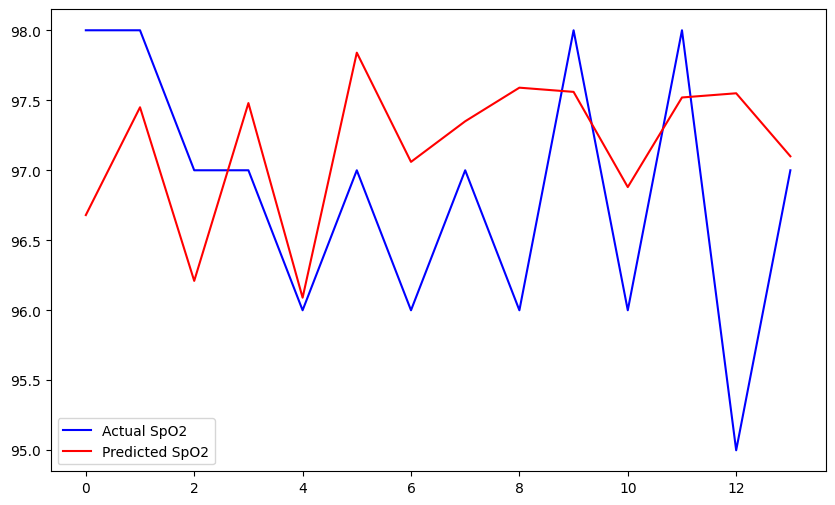

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual SpO2', color='blue')
plt.plot(y_pred, label='Predicted SpO2', color='red')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Fitting 3 folds for each of 162 candidates, totalling 486 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-validated MAE: {-scores.mean()}")

Cross-validated MAE: 0.8253818181818176


In [ ]:
# Create a DataFrame with Actual and Predicted values
results_df = pd.DataFrame({
    'Actual SpO2': y_test,
    'Predicted SpO2': y_pred
})

# Preview the DataFrame
results_df.head()

,Actual SpO2,Predicted SpO2
54,98,96.68
62,98,97.45
0,97,96.21
45,97,97.48
5,96,96.09


In [ ]:
# Save the DataFrame to a CSV file
results_df.to_csv('actual_vs_predicted_spo2.csv', index=False)

# Download the CSV file in Google Colab
from google.colab import files
files.download('actual_vs_predicted_spo2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>